Import requires libraries for EDA

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
import scipy.stats as stats

print("Everything imported successfully!")

Everything imported successfully!


Load data into the data frame (pandas)

In [196]:
df = pd.read_csv("Chocolate Sales.csv")

df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [198]:
df.dtypes

Sales Person     object
Country          object
Product          object
Date             object
Amount           object
Boxes Shipped     int64
dtype: object

Clean data

Clean "Amount" column to remove '$' and ',', convert into integer value, and rename column to revenue

In [199]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)

df = df.rename(columns={'Amount': 'Revenue'})

print(df['Revenue'].head())

0     5320.0
1     7896.0
2     4501.0
3    12726.0
4    13685.0
Name: Revenue, dtype: float64


Clean "Date" to datetime format
(it appears that the dates in this data only ranges from Jan 2022 to Aug 2022)

In [200]:
df["Date"] = pd.to_datetime(df["Date"])

print(df['Date'].head())

0   2022-01-04
1   2022-08-01
2   2022-07-07
3   2022-04-27
4   2022-02-24
Name: Date, dtype: datetime64[ns]


C:\Users\rosal\AppData\Local\Temp\ipykernel_4788\965658037.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Check for null values 

In [201]:
print(df.isnull().sum())

Sales Person     0
Country          0
Product          0
Date             0
Revenue          0
Boxes Shipped    0
dtype: int64


Sales Analysis
We want to identify the sales pattern for each sales person so that we can then measure their sales and performance. To do so, we'll see if every product is sold at a fixed rate and if a sales person's product mix varies as these variables can affect the revenue each sales person brings in. 

First, let's check if the price of each product is unique. We can do that by finding the number of unique prices each product is sold at. If there is only 1 unique number, then the products are sold at a fixed price.

In [202]:
df['revenue_per_box'] = df['Revenue'] / df['Boxes Shipped']

# Check for variability in price per product
product_price_variability = df.groupby('Product')['revenue_per_box'].nunique().reset_index()
product_price_variability.columns = ['Product', 'num_unique_prices']

# Look at products with more than 1 unique price
variable_price_products = product_price_variability[product_price_variability['num_unique_prices'] > 1]

print(variable_price_products)


                 Product  num_unique_prices
0         50% Dark Bites                 60
1         70% Dark Bites                 42
2          85% Dark Bars                 50
3        99% Dark & Pure                 49
4            After Nines                 50
5           Almond Choco                 48
6    Baker's Choco Chips                 41
7   Caramel Stuffed Bars                 43
8   Choco Coated Almonds                 39
9          Drinking Coco                 56
10               Eclairs                 60
11      Fruit & Nut Bars                 50
12    Manuka Honey Choco                 45
13             Milk Bars                 49
14       Mint Chip Choco                 45
15          Orange Choco                 47
16   Organic Choco Syrup                 52
17   Peanut Butter Cubes                 49
18       Raspberry Choco                 48
19    Smooth Sliky Salty                 59
20   Spicy Special Slims                 54
21            White Choc        

We can see that all of the products are sold at more then one unique price, meaning that they are not sold at a fixed price point. 

Next, we'll see whether a sales person's product varies or if they only sell only specialised or restricted range of products.

In [203]:
product_mix = df.groupby('Sales Person')['Product'].nunique().reset_index()
product_mix.columns = ['Sales Person', 'num_unique_products']
print(product_mix.sort_values('num_unique_products', ascending=False))

           Sales Person  num_unique_products
16        Kelci Walkden                   22
22      Roddy Speechley                   22
6        Curtice Advani                   21
3           Brien Boise                   21
0        Andria Kimpton                   21
15     Karlen McCaffrey                   21
23          Van Tuxwell                   21
7   Dennison Crosswaite                   21
2        Beverie Moffet                   20
20           Oby Sorrel                   20
19       Marney O'Breen                   20
17      Madelene Upcott                   20
5          Ches Bonnell                   20
13       Jehu Rudeforth                   20
12         Jan Morforth                   20
9          Gigi Bohling                   20
11         Husein Augar                   20
1          Barr Faughny                   19
8        Dotty Strutley                   19
14          Kaine Padly                   19
10      Gunar Cockshoot                   18
21  Rafael

Since there are 22 products in total, and each sales person sells at least 15 different products, it appears that all sales person has a wide range of products and are not restricted to specialised products.

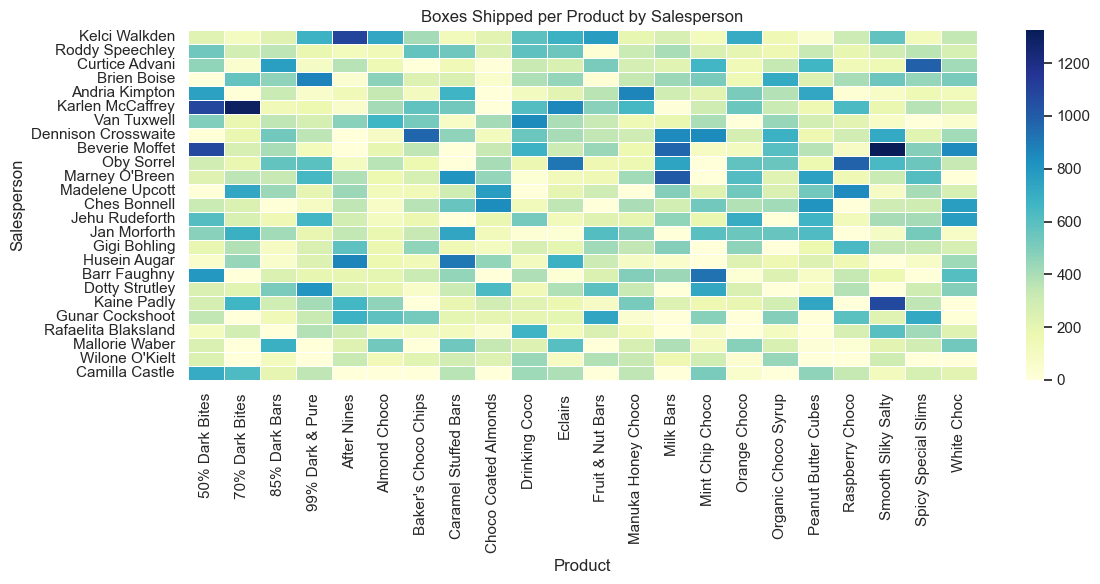

In [ ]:
product_distribution = df.pivot_table(index='Sales Person', columns='Product', 
                                      values='Boxes Shipped', aggfunc='sum', fill_value=0)

num_products = (product_distribution > 0).sum(axis=1)

# 3. Sort the pivot table index by that count (descending)
product_distribution_sorted = product_distribution.loc[num_products.sort_values(ascending=False).index]


plt.figure(figsize=(12, 6))
sns.heatmap(product_distribution_sorted, cmap='YlGnBu', linewidths=0.5)
plt.title('Boxes Shipped per Product by Salesperson')
plt.xlabel('Product')
plt.ylabel('Salesperson')
plt.tight_layout()
plt.savefig("hmboxesbysalesperson.png")
plt.show()

According to the heatmap above, we can see which products a sales person tends to push more/less.

Now, let's measure the performance of each sales person by looking at their total revenue.

C:\Users\rosal\AppData\Local\Temp\ipykernel_4788\2793006850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


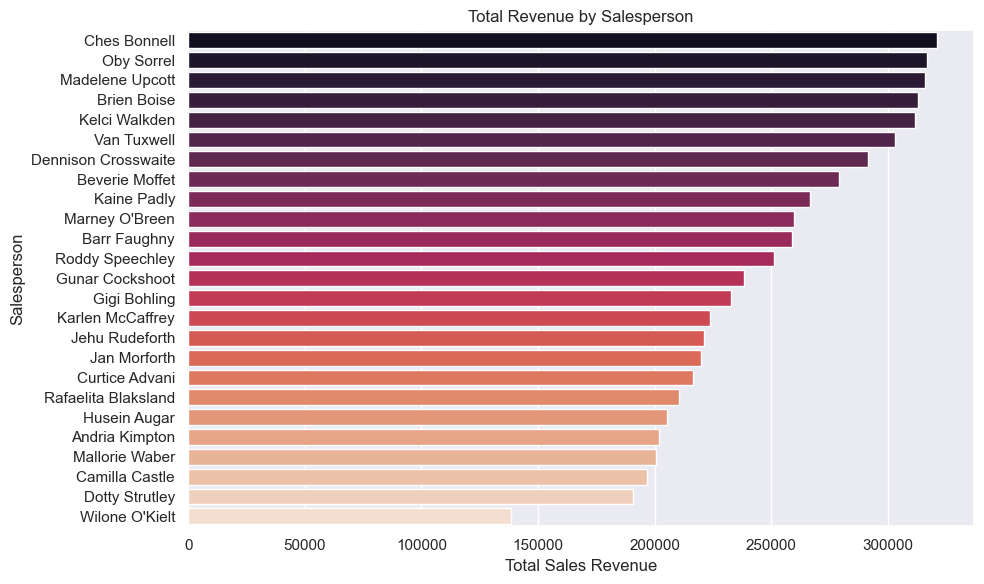

In [214]:
sales_revenue = df.groupby('Sales Person').agg({
    'Revenue': 'sum'
}).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=sales_revenue.sort_values('Revenue', ascending=False),
    x='Revenue',
    y='Sales Person',
    palette='rocket'
)
plt.xlabel('Total Sales Revenue')
plt.ylabel('Salesperson')
plt.title('Total Revenue by Salesperson')
plt.tight_layout()
plt.savefig("totalrev.png")
plt.show()

Now we want to see the relation between:
 1  revenue & number of products sold
 2  revenue & number of boxes shipped

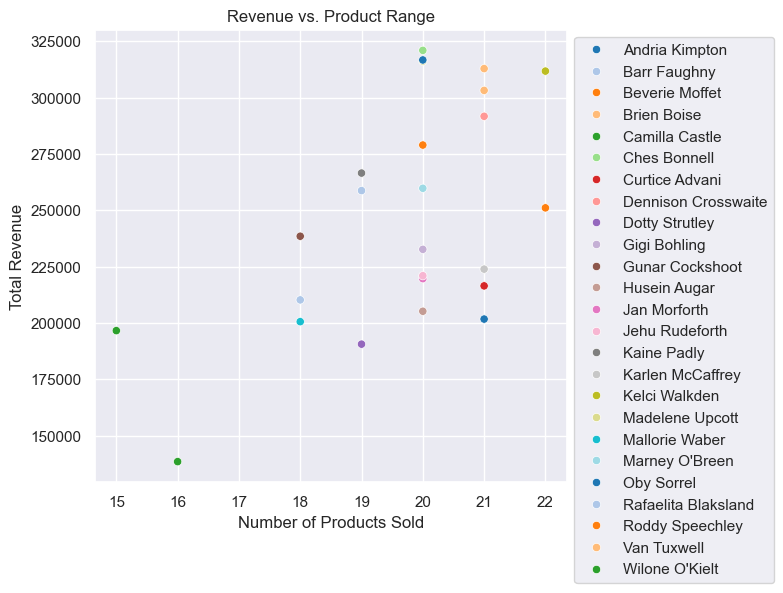

<Figure size 640x480 with 0 Axes>

In [ ]:
product_range = df.groupby('Sales Person')['Product'].nunique()
product_range = product_range.reset_index()
product_range.columns = ['Sales Person', 'Product Range']

combine_data = pd.merge(sales_revenue,product_range, on='Sales Person')

plt.figure(figsize=(8,6))
sns.scatterplot(data=combine_data, x='Product Range', y='Revenue', hue='Sales Person', palette='tab20')
plt.title('Revenue vs. Product Range')
plt.xlabel('Number of Products Sold')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("sprevrange.png")
plt.show()

In [207]:
r_value1, p_value1 = stats.pearsonr(combine_data['Product Range'], combine_data['Revenue'])
print(f"Correlation Coefficient: {r_value1}")
print(f"P-value: {p_value1}")

Correlation Coefficient: 0.5554066082028689
P-value: 0.003949240445388545


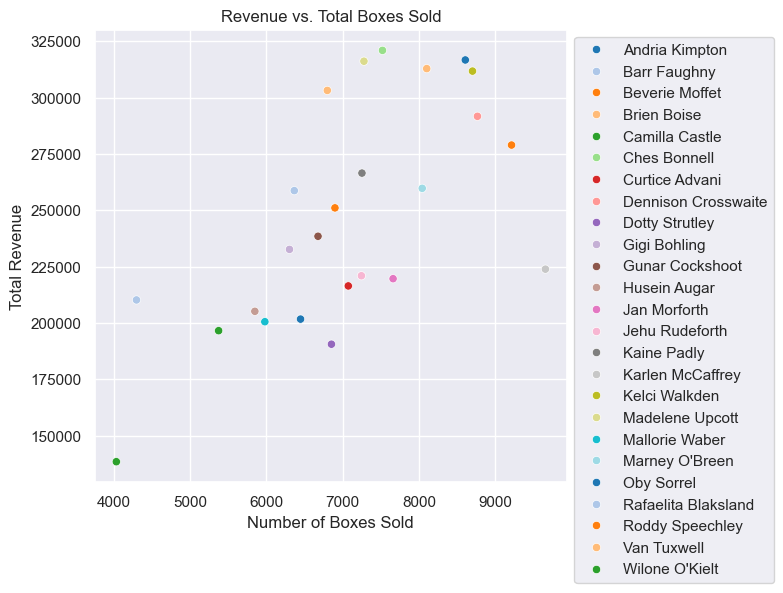

<Figure size 640x480 with 0 Axes>

In [ ]:
total_boxes_sold = df.groupby('Sales Person')['Boxes Shipped'].sum().reset_index()
total_boxes_sold.columns = ['Sales Person', 'Total Boxes Sold']

combine_data2 = pd.merge(sales_revenue,total_boxes_sold, on='Sales Person')

plt.figure(figsize=(8,6))
sns.scatterplot(data=combine_data2, x='Total Boxes Sold', y='Revenue', hue='Sales Person', palette='tab20')
plt.title('Revenue vs. Total Boxes Sold')
plt.xlabel('Number of Boxes Sold')
plt.ylabel('Total Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("sprevnumbox.png")
plt.show()

In [209]:
r_value2, p_value2 = stats.pearsonr(combine_data2['Total Boxes Sold'], combine_data2['Revenue'])
print(f"Correlation Coefficient: {r_value2}")
print(f"P-value: {p_value2}")

Correlation Coefficient: 0.6439484017571606
P-value: 0.0005136656349430937


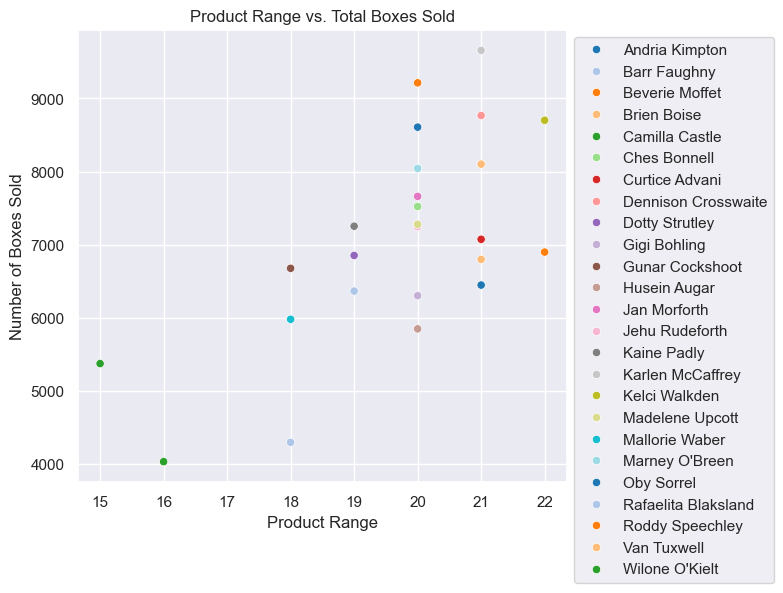

<Figure size 640x480 with 0 Axes>

In [ ]:
combine_data3 = pd.merge(product_range, total_boxes_sold, on='Sales Person')

plt.figure(figsize=(8,6))
sns.scatterplot(data=combine_data3, x='Product Range', y='Total Boxes Sold', hue='Sales Person', palette='tab20')
plt.title('Product Range vs. Total Boxes Sold')
plt.xlabel('Product Range')
plt.ylabel('Number of Boxes Sold')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("spnumboxrange.png")
plt.show()

In [211]:
r_value3, p_value3 = stats.pearsonr(combine_data3['Product Range'], combine_data3['Total Boxes Sold'])
print(f"Correlation Coefficient: {r_value3}")
print(f"P-value: {p_value3}")

Correlation Coefficient: 0.6690174167587031
P-value: 0.00025559748793400227
